In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
x=dataset.iloc[:, [3,4]].values

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler

In [6]:
# Generate synthetic data
x, labels = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

In [7]:
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)

In [8]:
# Apply OPTICS
optics = OPTICS(min_samples=5)
cluster_labels = optics.fit_predict(data_scaled)

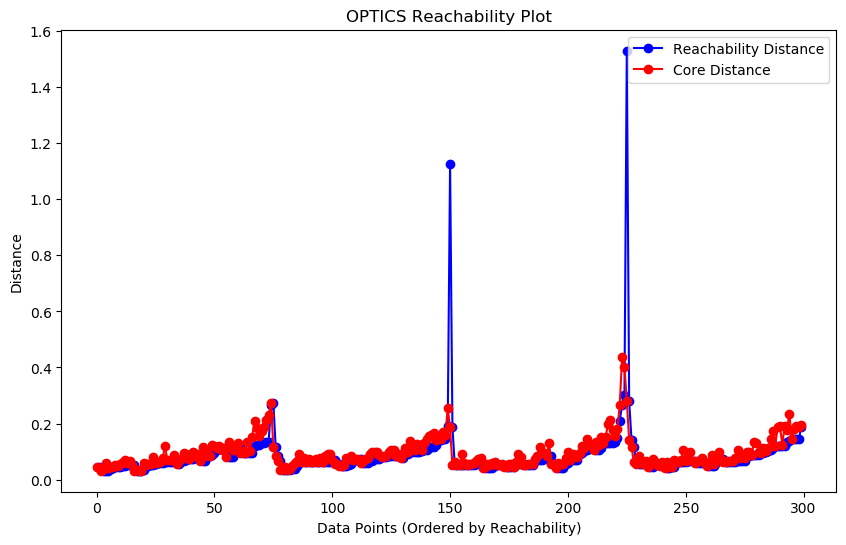

In [9]:
# Plot the reachability plot
reachability = optics.reachability_[optics.ordering_]
core_distances = optics.core_distances_[optics.ordering_]

plt.figure(figsize=(10, 6))

plt.plot(range(len(reachability)), reachability, marker='o', linestyle='-', color='b', label='Reachability Distance')
plt.plot(range(len(core_distances)), core_distances, marker='o', linestyle='-', color='r', label='Core Distance')

plt.title('OPTICS Reachability Plot')
plt.xlabel('Data Points (Ordered by Reachability)')
plt.ylabel('Distance')
plt.legend()
plt.show()

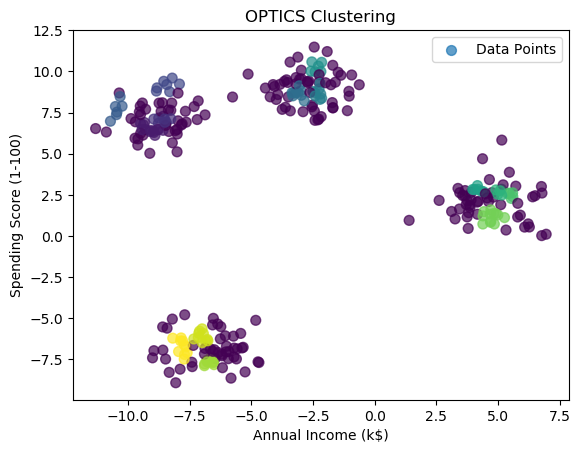

In [10]:
# Plot the data points
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7, label='Data Points')
plt.title('OPTICS Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()